In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import seaborn as sns 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

In [2]:
df = pd.read_csv('data/Bacterial_strain_heatmap_tutorial_data.csv').set_index('Strain')
df.head()

,OqxA,OqxB,emrAB,nfsA,nfsB,MexAB-OprM,mdt Efflux pump genes,blaSHV-28,blaSHV-148,aac(3)-Iid,...,acrREF,mrkD,iutA,entABCDEFHS,treC,pgaABC,ureDABCEFG,Capsule K1,Capsule K2,Capsule K57
Strain,,,,,,,,,,,,,,,,,,,,,
Strain 1,2,2,0,0,0,2,2,0,2,0,...,2,2,2,2,2,2,2,3,5,5
Strain 2,2,2,2,2,2,2,2,0,2,0,...,2,2,2,2,2,2,2,3,5,5
Strain 3,0,2,2,2,2,2,2,0,2,0,...,2,2,2,2,2,2,2,3,5,5
Strain 4,2,2,2,2,2,2,2,0,2,0,...,2,2,2,2,2,2,2,3,5,5
Strain 5,2,2,2,2,2,2,2,0,2,0,...,2,2,2,2,2,2,2,3,5,5


In [3]:
df.columns

Index(['OqxA', 'OqxB', 'emrAB', 'nfsA', 'nfsB', 'MexAB-OprM',
       'mdt Efflux pump genes', 'blaSHV-28', 'blaSHV-148', 'aac(3)-Iid',
       'aac(3)-Iie', 'aac(6')-Ib-cr', 'strA', 'strB', 'blaCTX-M-14',
       'blaCTX-M-15', 'blaLAP-2', 'blaOXA-1', 'blaTEM-1B', 'dfrA1', 'dfrA14',
       'qnrB1', 'qnrS1', 'sul1', 'sul2', 'tet(A)', 'clpK', 'traT',
       'fecIRABCDE', 'acrAB', 'acrREF', 'mrkD', 'iutA', 'entABCDEFHS', 'treC',
       'pgaABC', 'ureDABCEFG', 'Capsule K1', 'Capsule K2', 'Capsule K57'],
      dtype='object')

In [4]:
amr_columns_to_extract = ['OqxA', 'OqxB', 'emrAB', 'nfsA', 'nfsB', 'MexAB-OprM',
                          'mdt Efflux pump genes', 'blaSHV-28', 'blaSHV-148', 'aac(3)-Iid',
                          'aac(3)-Iie', "aac(6')-Ib-cr", 'strA', 'strB', 'blaCTX-M-14',
                          'blaCTX-M-15', 'blaLAP-2', 'blaOXA-1', 'blaTEM-1B', 'dfrA1', 'dfrA14',
                          'qnrB1', 'qnrS1', 'sul1', 'sul2', 'tet(A)']

virulence_columns_to_extract = ['clpK', 'traT', 'fecIRABCDE', 'acrAB', 'acrREF', 
                                'mrkD', 'iutA', 'entABCDEFHS', 'treC', 'pgaABC', 'ureDABCEFG']

capsule_type = ['Capsule K1', 'Capsule K2', 'Capsule K57']

In [5]:
cmap_dict = {0: '#E9EEEC', 1: '#6B83A9',2: '#868B89'}
cmap = ListedColormap([cmap_dict[i] for i in range(0,3)])

cmap_dict_2 = {3: '#D43B34', 4: '#79D170',5: '#E9EEEC'}
cmap2 = ListedColormap([cmap_dict_2[i] for i in range(3,6)])

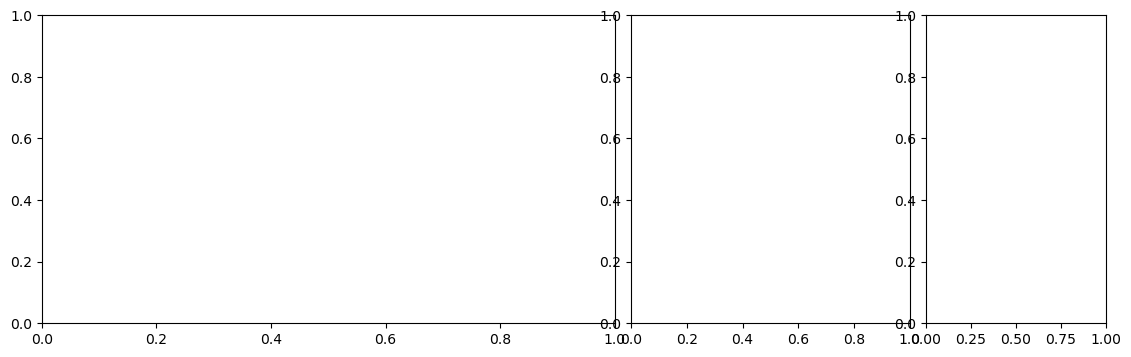

In [6]:
fig = plt.figure(figsize=(15, 4))

ax1 = plt.subplot2grid((1, 12), (0, 0), colspan=6)
ax2 = plt.subplot2grid((1, 12), (0, 6), colspan=3)
ax3 = plt.subplot2grid((1, 12), (0, 9), colspan=2)

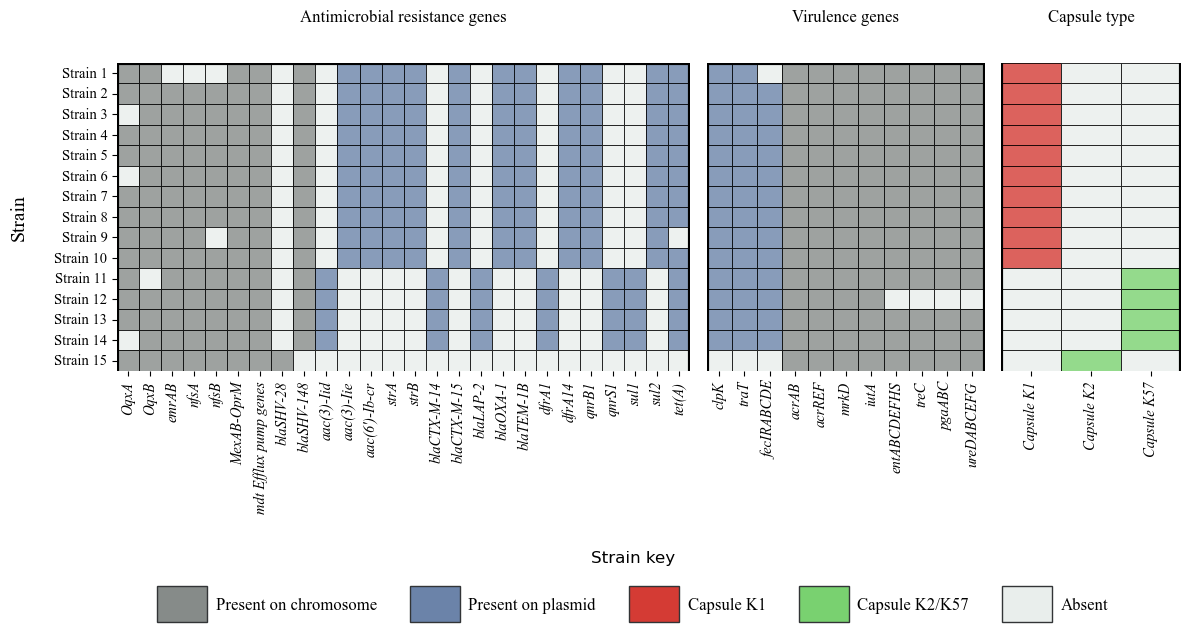

In [7]:
fig = plt.figure(figsize=(15, 4))

ax1 = plt.subplot2grid((1, 12), (0, 0), colspan=6)
ax2 = plt.subplot2grid((1, 12), (0, 6), colspan=3)
ax3 = plt.subplot2grid((1, 12), (0, 9), colspan=2)


ax1.set_title('Antimicrobial resistance genes',size=12, pad=30, fontname='Times New Roman')

ax1 = sns.heatmap(df[amr_columns_to_extract], cmap=cmap, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax1)

for tick in ax1.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_style('italic')
ax1.tick_params(axis='x', labelsize=10.5)


for tick in ax1.get_yticklabels():
    tick.set_fontname('Times New Roman')
ax1.tick_params(axis='y', labelsize=10.5)


ax1.set_ylabel("Strain\n", fontname='Times New Roman', fontsize=14)


legend_elements = [ Patch(facecolor='#868B89', edgecolor='#323436',
                         label='Present on chromosome'),
                   Patch(facecolor='#6B83A9', edgecolor='#323436',
                         label='Present on plasmid'),
                  Patch(facecolor='#D43B34', edgecolor='#323436',
                         label='Capsule K1'),
                  Patch(facecolor='#79D170', edgecolor='#323436',
                         label='Capsule K2/K57'),
                  Patch(facecolor='#E9EEEC', edgecolor='#323436',
                         label='Absent')]


ax1.legend(handles=legend_elements, 
          bbox_to_anchor=[0.9, -0.7], 
          title='Strain key', 
          ncol=5,
          frameon=False,
          prop={'size': 12, 'family': 'Times New Roman'},
          title_fontsize=12,
          handleheight=3, 
          handlelength=3,
          handletextpad=0.5,
          labelspacing=1.2,
          loc='center')

ax1.axhline(y=0, color='k',linewidth=3)
ax1.axhline(y=df[amr_columns_to_extract].shape[1], color='k',linewidth=3)
ax1.axvline(x=0, color='k',linewidth=3)
ax1.axvline(x=df[amr_columns_to_extract].shape[1], color='k',linewidth=3); 

ax2 = sns.heatmap(df[virulence_columns_to_extract], cmap=cmap, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax2)

ax2.set_title('Virulence genes',size=12, pad=30, fontname='Times New Roman')

for tick in ax2.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_style('italic')
ax2.tick_params(axis='x', labelsize=10.5)

for tick in ax2.get_yticklabels():
    tick.set_visible(False)
    
ax2.tick_params(left=False)
ax2.set_ylabel('')    
    
ax2.axhline(y=0, color='k',linewidth=3)

ax2.axvline(x=0, color='k',linewidth=3)
ax2.axvline(x=df[virulence_columns_to_extract].shape[1], color='k',linewidth=3); 

ax3 = sns.heatmap(df[capsule_type], cmap=cmap2, cbar=False,linewidths=0.4, 
                  linecolor='black', alpha=0.8, ax=ax3)

ax3.set_title('Capsule type',size=12, pad=30, fontname='Times New Roman')

for tick in ax3.get_xticklabels():
    tick.set_fontname('Times New Roman')
    tick.set_style('italic')
ax3.tick_params(axis='x', labelsize=10.5)

for tick in ax3.get_yticklabels():
    tick.set_visible(False)
    
ax3.tick_params(left=False)
ax3.set_ylabel('')


ax3.axvline(x=0, color='k',linewidth=3)
ax3.axvline(x=df[capsule_type].shape[1], color='k',linewidth=3); 